# Standings table

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
# We create the request for the url and get the data. 
# We create the file if it does not exists or overwrite it if it does. 
url = 'https://www.espn.com/mlb/standings/_/group/overall'
data = requests.get(url)
info = "standings"
with open ('mlb/{}.html'.format(info), 'w+') as f:
    f.write(data.text)

In [3]:
# We read the file we created
with open ("mlb/{}.html".format(info)) as f:
    page = f.read()

In [4]:
# We use the BeautifulSoup library 
soup = BeautifulSoup(page,  'html.parser')
soup.find('div', class_='flex').decompose()
standings = soup.find_all('div', class_='flex')

In [5]:
# We read 
team_standings0 = pd.read_html(str(standings))[0]
team_standings1 = pd.read_html(str(standings))[1]

In [6]:
team_standings = pd.merge(team_standings0, team_standings1, left_index=True, right_index =True)

In [7]:
team_standings.rename({0: 'teams'}, axis=1, inplace=True)

In [8]:
team_standings[['home_wins','home_looses']]= team_standings.HOME.str.split('-',expand=True)
team_standings[['away_wins','away_looses']]= team_standings.AWAY.str.split('-',expand=True)
team_standings[['last_ten_wins','last_ten_looses']]= team_standings.L10.str.split('-',expand=True)
team_standings.drop(['HOME','GB','AWAY','L10'], axis =1, inplace=True)
convert = {'W': int,'L': int, 'PCT': float, 'RS':int, 'RA':int, 'home_wins':int, 'home_looses':int,'away_wins':int,'away_looses':int,
           'last_ten_wins':int, 'last_ten_looses':int}
team_standings.astype(convert)
team_standings['teams'] = team_standings['teams'].str.replace(r'^[A-Z]+(?=[A-Z])', '', regex=True)

In [9]:
team_standings

,teams,W,L,PCT,RS,RA,DIFF,STRK,home_wins,home_looses,away_wins,away_looses,last_ten_wins,last_ten_looses
0,New York Yankees,43,16,0.729,289,176,113,W3,25,7,18,9,9,1
1,New York Mets,39,22,0.639,312,249,63,L1,19,8,20,14,5,5
2,Los Angeles Dodgers,37,22,0.627,309,201,108,L2,17,10,20,12,4,6
3,San Diego Padres,37,23,0.617,266,216,50,L1,17,12,20,11,7,3
4,Houston Astros,36,23,0.610,239,201,38,L3,15,10,21,13,5,5
5,Toronto Blue Jays,34,24,0.586,257,229,28,L1,18,10,16,14,6,4
6,Tampa Bay Rays,34,25,0.576,249,233,16,L2,21,13,13,12,6,4
7,Minnesota Twins,35,26,0.574,278,247,31,W2,20,13,15,13,5,5
8,St. Louis Cardinals,34,26,0.567,282,236,46,W2,18,11,16,15,5,5
9,San Francisco Giants,32,26,0.552,290,257,33,W2,16,13,16,13,5,5


# Battering Stats

In [10]:

url = 'https://www.espn.com/mlb/stats/team'
data = requests.get(url)
Stats_name = 'battering_stats'
with open ('mlb/{}.html'.format(Stats_name), 'w+') as f:
    f.write(data.text)

In [11]:
with open ("mlb/{}.html".format(Stats_name)) as f:
    page_battering = f.read()

In [12]:
soup = BeautifulSoup(page_battering,  'html.parser')

In [13]:
battering_stats = soup.find_all('div', class_='flex')

In [14]:
df0 = pd.read_html(str(battering_stats))[0]
df1 = pd.read_html(str(battering_stats))[1]


In [15]:
battering_stats = pd.merge(df0, df1, left_index=True, right_index =True)

In [16]:
battering_stats.drop("RK", inplace=True, axis = 1)

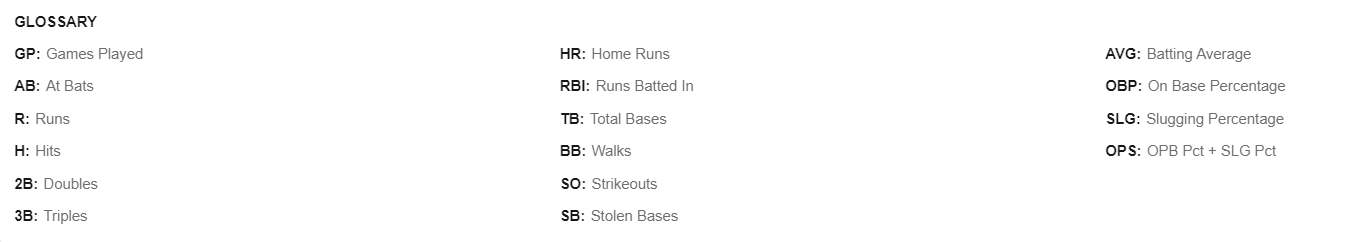

In [17]:
battering_stats

,Team,GP,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,AVG,OBP,SLG,OPS
0,New York Mets,61,2074,312,548,95,14,57,297,842,192,456,26,0.264,0.335,0.406,0.741
1,Washington Nationals,61,2062,256,531,101,6,49,245,791,183,440,25,0.258,0.322,0.384,0.706
2,Colorado Rockies,60,2064,270,530,96,10,53,256,805,178,480,13,0.257,0.321,0.390,0.711
3,Boston Red Sox,60,2081,282,533,146,5,57,275,860,169,483,19,0.256,0.315,0.413,0.729
4,Minnesota Twins,61,2036,278,517,105,4,73,266,849,208,509,13,0.254,0.327,0.417,0.744
5,Toronto Blue Jays,58,1948,257,490,107,3,72,249,819,184,455,19,0.252,0.322,0.420,0.742
6,Philadelphia Phillies,59,2002,288,502,99,10,78,274,855,183,515,36,0.251,0.317,0.427,0.744
7,Los Angeles Dodgers,59,2001,309,501,114,10,71,290,848,236,480,38,0.250,0.331,0.424,0.755
8,St. Louis Cardinals,60,2043,282,510,99,7,57,268,794,193,446,45,0.250,0.319,0.389,0.708
9,Cleveland Guardians,55,1864,254,463,97,13,46,244,724,167,370,37,0.248,0.313,0.388,0.701


# Pitching stats

In [18]:
url = 'https://www.espn.com/mlb/stats/team/_/view/pitching'
data = requests.get(url)
Stats_name = 'pitching_stats'
with open ('mlb/{}.html'.format(Stats_name), 'w+') as f:
    f.write(data.text)

In [19]:
with open ("mlb/{}.html".format(Stats_name)) as f:
    page_pitching = f.read()

In [20]:
soup = BeautifulSoup(page_pitching,  'html.parser')
pitching_stats = soup.find_all('div', class_='flex')

In [21]:
df0 = pd.read_html(str(pitching_stats))[0]
df1 = pd.read_html(str(pitching_stats))[1]


In [22]:
pitching_stats = pd.merge(df0, df1, left_index=True, right_index =True)

In [23]:
pitching_stats.drop("RK", inplace=True, axis = 1)

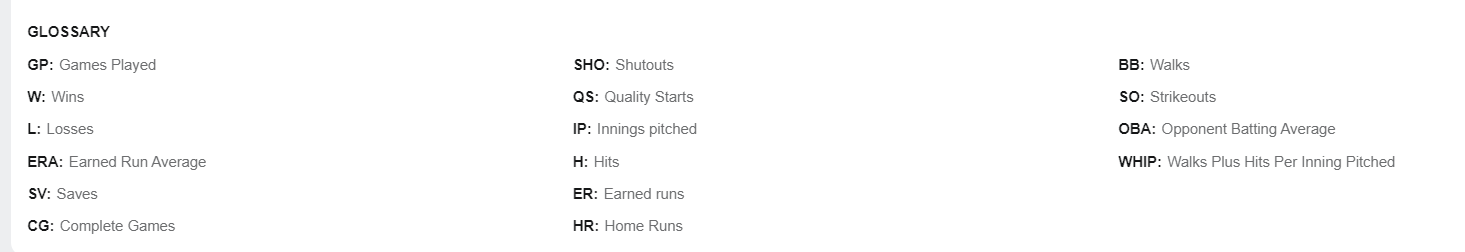

In [24]:
pitching_stats

,Team,GP,W,L,ERA,SV,CG,SHO,QS,IP,H,ER,HR,BB,SO,OBA,WHIP
0,New York Yankees,59,43,16,2.84,21,0,9,26,533.1,421,168,47,143,540,0.214,1.06
1,Los Angeles Dodgers,59,37,22,3.07,16,1,4,21,524.1,425,179,55,153,524,0.219,1.10
2,Houston Astros,59,36,23,3.08,16,1,7,28,520.1,424,178,51,171,489,0.220,1.14
3,San Diego Padres,60,37,23,3.30,20,0,8,34,540.2,427,198,50,185,539,0.216,1.13
4,Tampa Bay Rays,59,34,25,3.31,18,0,4,18,530.0,454,195,65,149,514,0.227,1.14
5,Toronto Blue Jays,58,34,24,3.65,21,0,5,26,512.1,476,208,56,148,476,0.245,1.22
6,Cleveland Guardians,55,28,27,3.67,11,0,2,26,485.0,406,198,59,156,455,0.226,1.16
7,Detroit Tigers,58,24,34,3.67,16,0,6,16,507.0,432,207,58,168,449,0.229,1.18
8,Boston Red Sox,60,31,29,3.67,11,3,5,18,536.1,460,219,67,174,521,0.229,1.18
9,Miami Marlins,57,27,30,3.69,13,1,3,20,502.2,432,206,61,186,508,0.230,1.23


# Fielding stats

In [25]:
url = 'https://www.espn.com/mlb/stats/team/_/view/fielding'
data = requests.get(url)
Stats_name = 'fielding_stats'
with open ('mlb/{}.html'.format(Stats_name), 'w+') as f:
    f.write(data.text)

In [26]:
with open ("mlb/{}.html".format(Stats_name)) as f:
    fielding = f.read()

In [27]:
soup = BeautifulSoup(fielding,  'html.parser')
fielding_stats = soup.find_all('div', class_='flex')

In [28]:
df0 = pd.read_html(str(fielding_stats))[0]
df1 = pd.read_html(str(fielding_stats))[1]


In [29]:
fielding_stats = pd.merge(df0, df1, left_index=True, right_index =True)

In [30]:
fielding_stats.drop("RK", inplace=True, axis = 1)

In [31]:
fielding_stats

,Team,GP,E,FP,TC,PO,A
0,San Diego Padres,60,21,0.990,2170,1601,548
1,New York Yankees,59,24,0.989,2172,1591,557
2,St. Louis Cardinals,60,25,0.989,2240,1598,617
3,Seattle Mariners,59,24,0.988,2051,1539,488
4,Chicago Cubs,58,27,0.988,2300,1750,523
5,Toronto Blue Jays,58,25,0.988,2055,1537,493
6,Atlanta Braves,60,27,0.987,2155,1608,520
7,Los Angeles Dodgers,59,27,0.987,2096,1573,496
8,Kansas City Royals,58,27,0.987,2091,1520,544
9,Houston Astros,59,27,0.987,2063,1561,475
